In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns



In [61]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
import optuna
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv("IMDb Movies India.csv")
df.dropna(inplace=True)
print(df.head())

                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                             #Yaaram -2019.0  110 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
8                  ?: A Question Mark -2012.0   82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
df.shape

(5653, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5653 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5653 non-null   object 
 1   Year      5653 non-null   float64
 2   Duration  5653 non-null   object 
 3   Genre     5653 non-null   object 
 4   Rating    5653 non-null   float64
 5   Votes     5653 non-null   object 
 6   Director  5653 non-null   object 
 7   Actor 1   5653 non-null   object 
 8   Actor 2   5653 non-null   object 
 9   Actor 3   5653 non-null   object 
dtypes: float64(2), object(8)
memory usage: 485.8+ KB


In [11]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5653,5653.00000,5653,5653,5653.000000,5653,5653,5653,5653,5653
unique,5379,NaN,174,375,NaN,2025,2427,1955,2317,2551
top,Zindagi,NaN,120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,169,844,NaN,90,41,104,52,57
mean,NaN,-1996.23262,NaN,NaN,5.897806,NaN,NaN,NaN,NaN,NaN
std,NaN,19.74586,NaN,NaN,1.381307,NaN,NaN,NaN,NaN,NaN
min,NaN,-2021.00000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2013.00000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-2002.00000,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1983.00000,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [12]:
# Explorartory Data Analysis
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

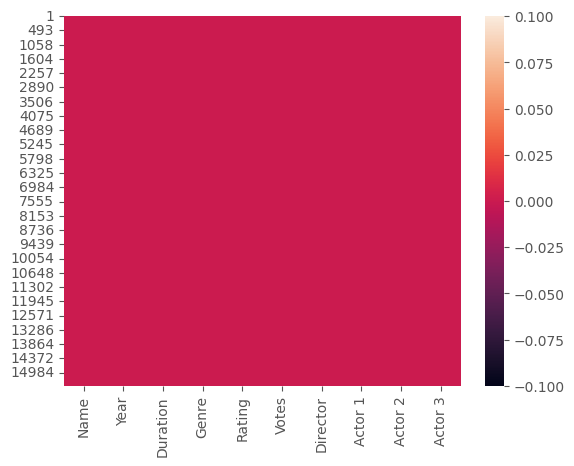

In [14]:
sns.heatmap(df.isnull());

In [15]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [16]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [17]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(5653, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5653 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5653 non-null   object 
 1   Year      5653 non-null   float64
 2   Duration  5653 non-null   int64  
 3   Genre     5653 non-null   object 
 4   Rating    5653 non-null   float64
 5   Votes     5653 non-null   object 
 6   Director  5653 non-null   object 
 7   Actor 1   5653 non-null   object 
 8   Actor 2   5653 non-null   object 
 9   Actor 3   5653 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 485.8+ KB


In [21]:
df.isnull().sum(axis=1).sort_values(ascending=False)

1        0
10070    0
10278    0
10276    0
10274    0
        ..
5033     0
5030     0
5029     0
5027     0
15508    0
Length: 5653, dtype: int64

In [22]:
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [23]:
df[df['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1


In [25]:
df.dropna(subset=['Duration'],inplace=True)

In [26]:
df.Director.describe()

count             5653
unique            2427
top       David Dhawan
freq                41
Name: Director, dtype: object

In [27]:
df.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Shakti Samanta          33
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
                        ..
Krishnadev Yagnik        1
Krishna Shah             1
Krishna Mishra           1
Krishna Kumar            1
Zunaid Memon             1
Name: Director, Length: 2427, dtype: int64

In [28]:
df['Director'].fillna('David Dhawan',inplace=True)

In [31]:
df.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                            844
Drama, Romance                   331
Action, Crime, Drama             329
Action, Drama                    206
Comedy, Drama                    205
                                ... 
Adventure, Comedy, Family          1
Adventure, Biography, History      1
Action, War                        1
Action, Thriller, War              1
Comedy, Sci-Fi                     1
Name: Genre, Length: 375, dtype: int64

In [32]:
df['Actor 1'].describe()

count                 5653
unique                1955
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [33]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


Text(0.5, 1.0, 'Number of Movies Per Year')

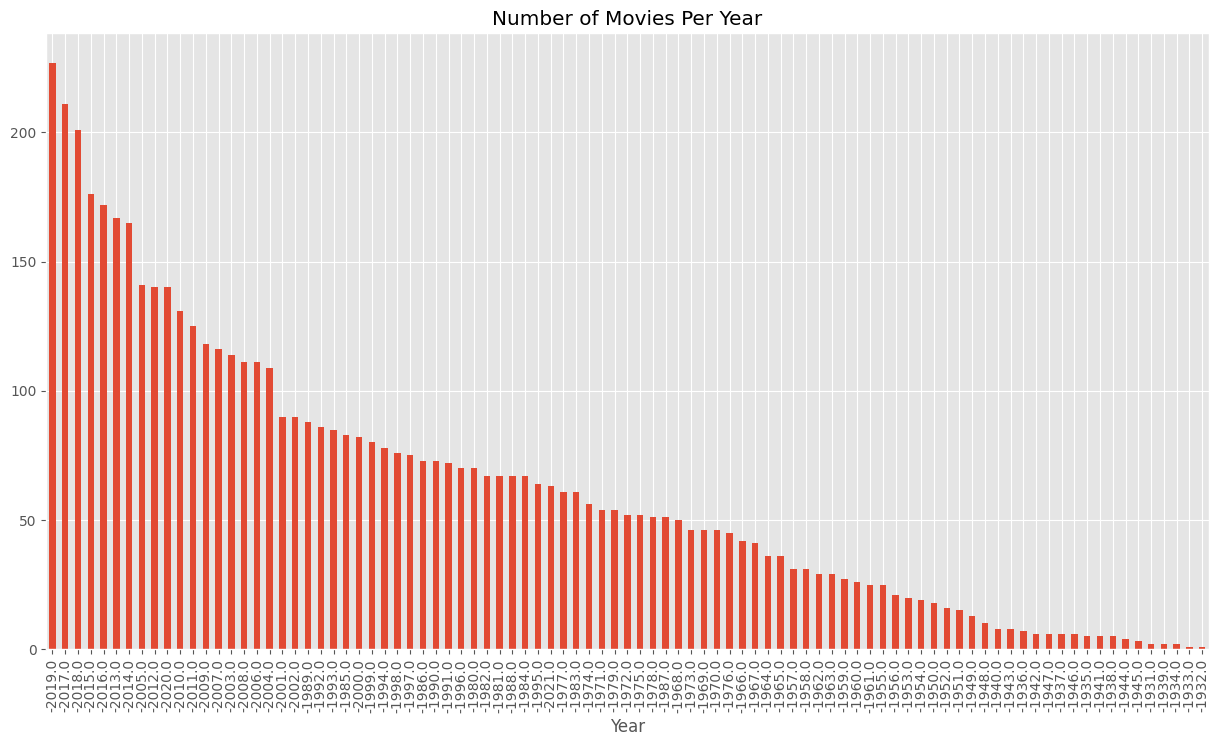

In [34]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

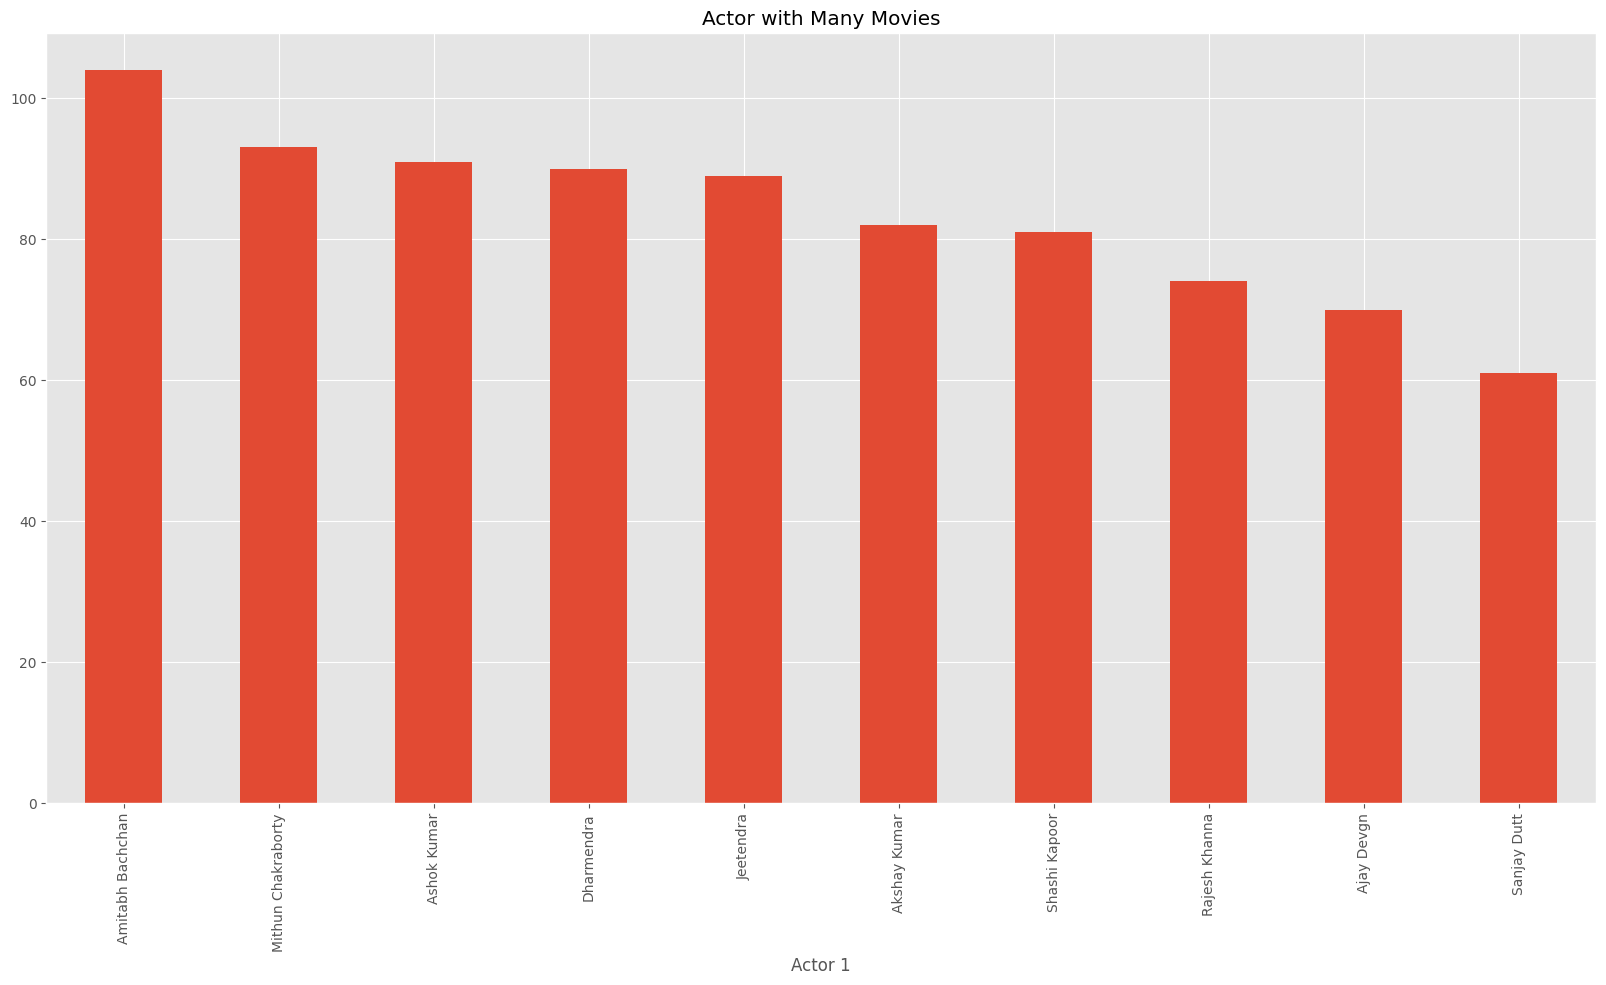

In [35]:
plt.figure(figsize=(20,10))
df['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

<Axes: >

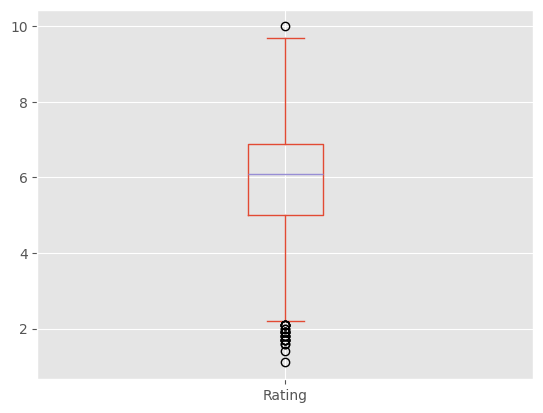

In [37]:
df['Rating'].plot(kind='box')

<Axes: xlabel='Duration', ylabel='Rating'>

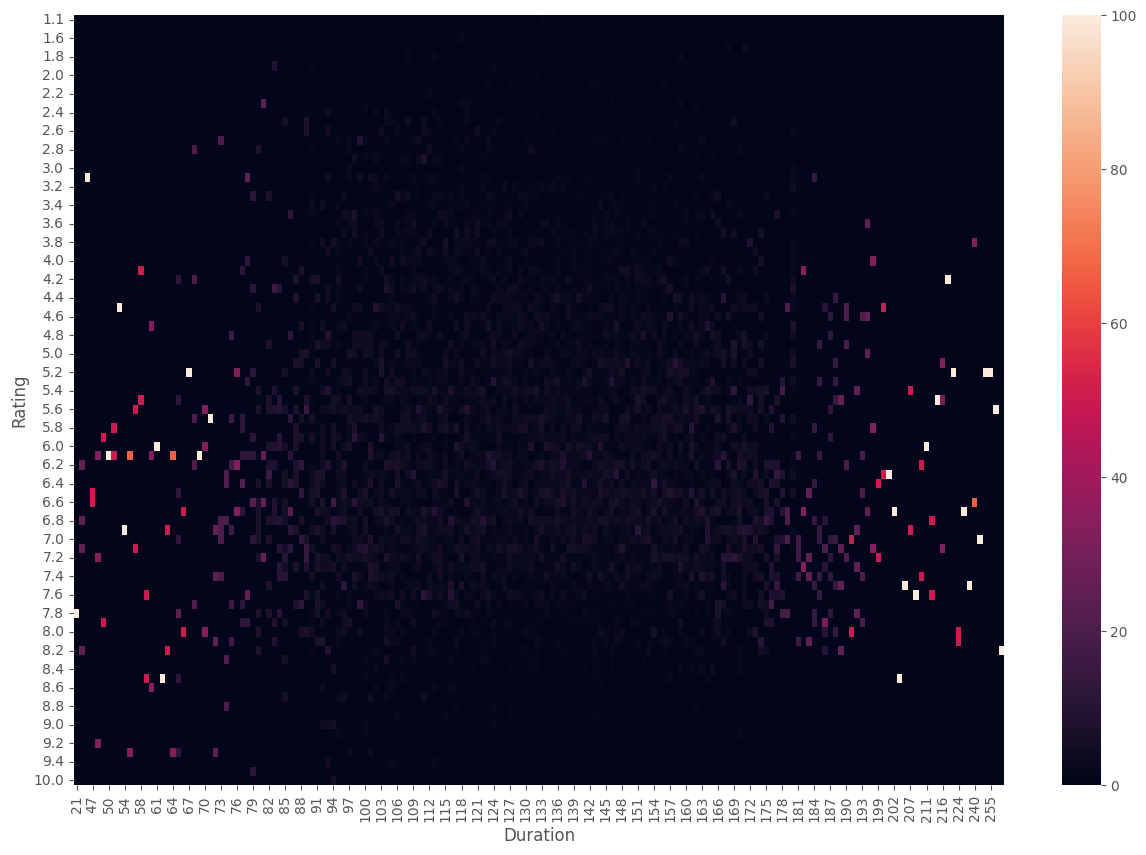

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Duration'], normalize='columns') * 100)

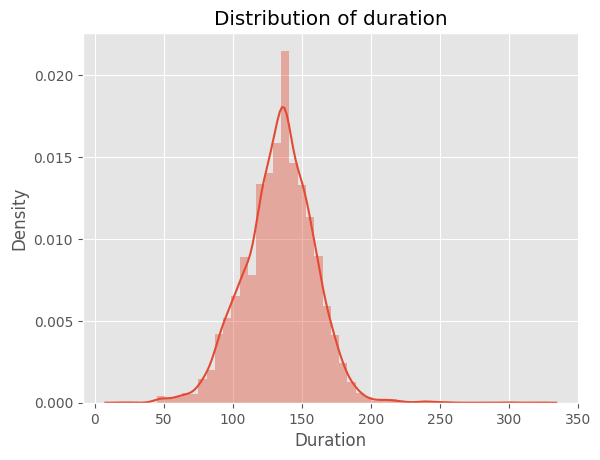

In [44]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

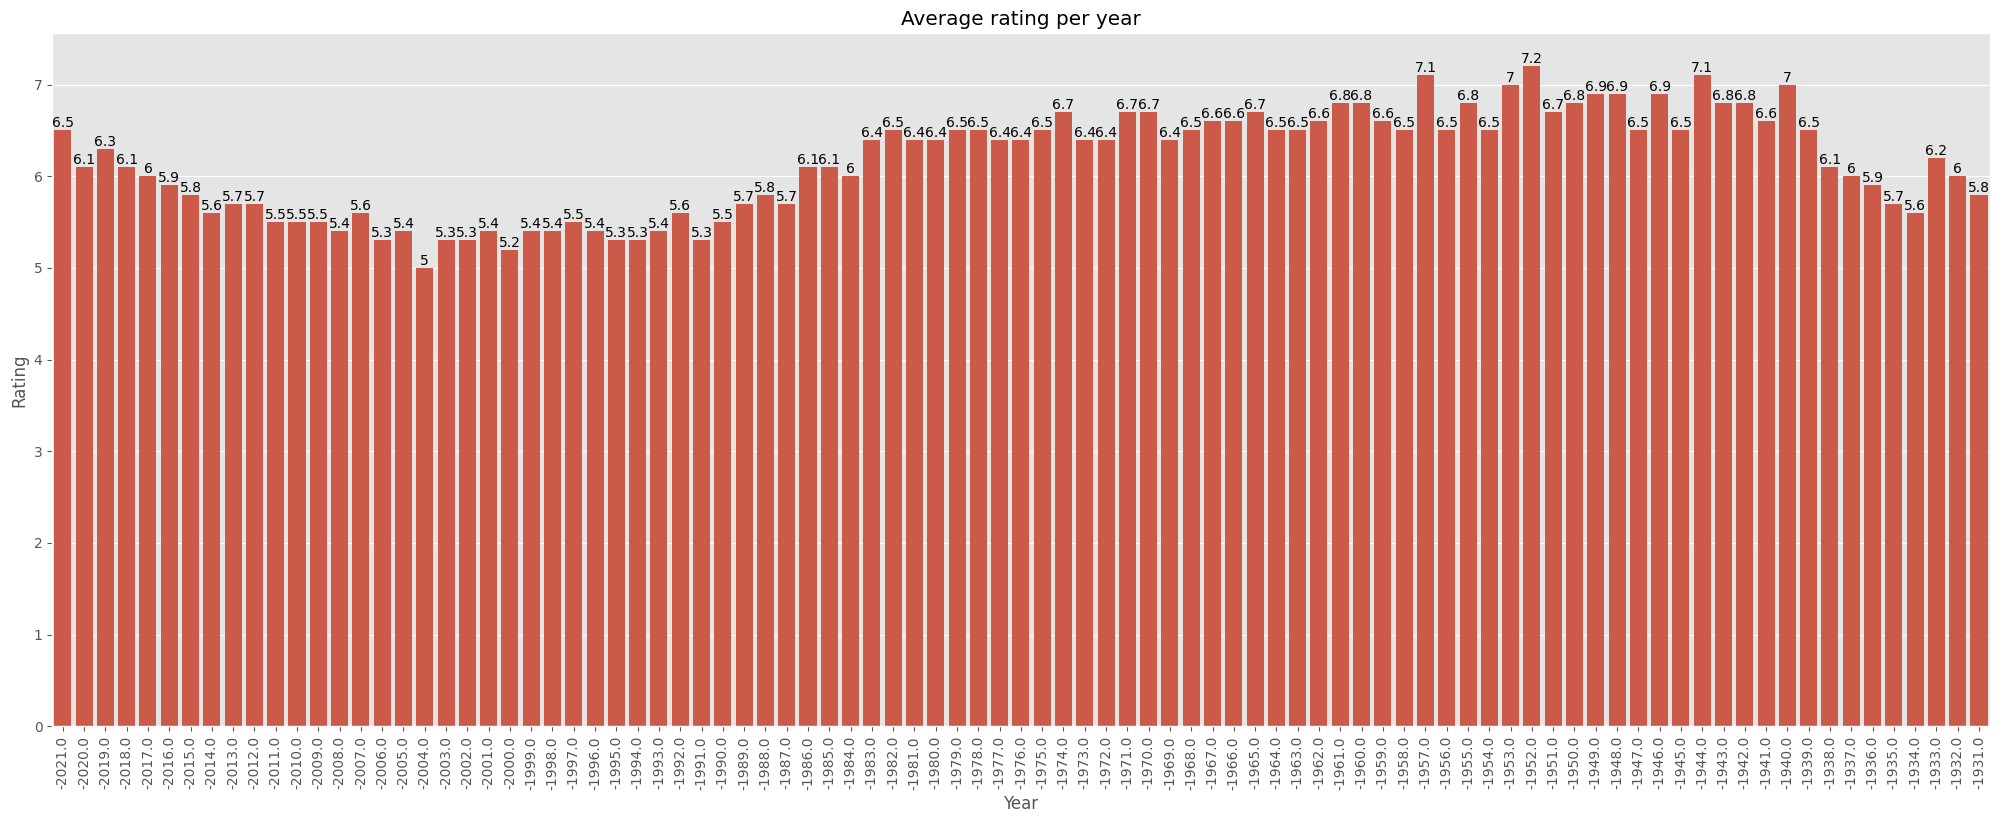

In [46]:
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

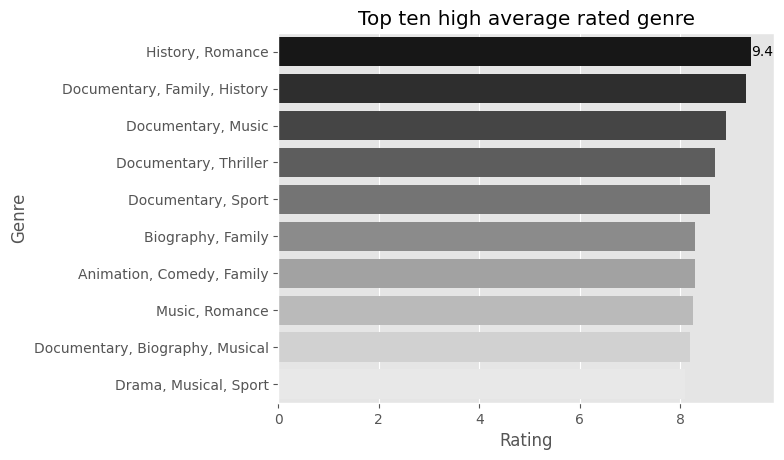

In [48]:
# plot top ten high average rated genre 
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

Text(0.5, 1.0, 'Director with most Movies')

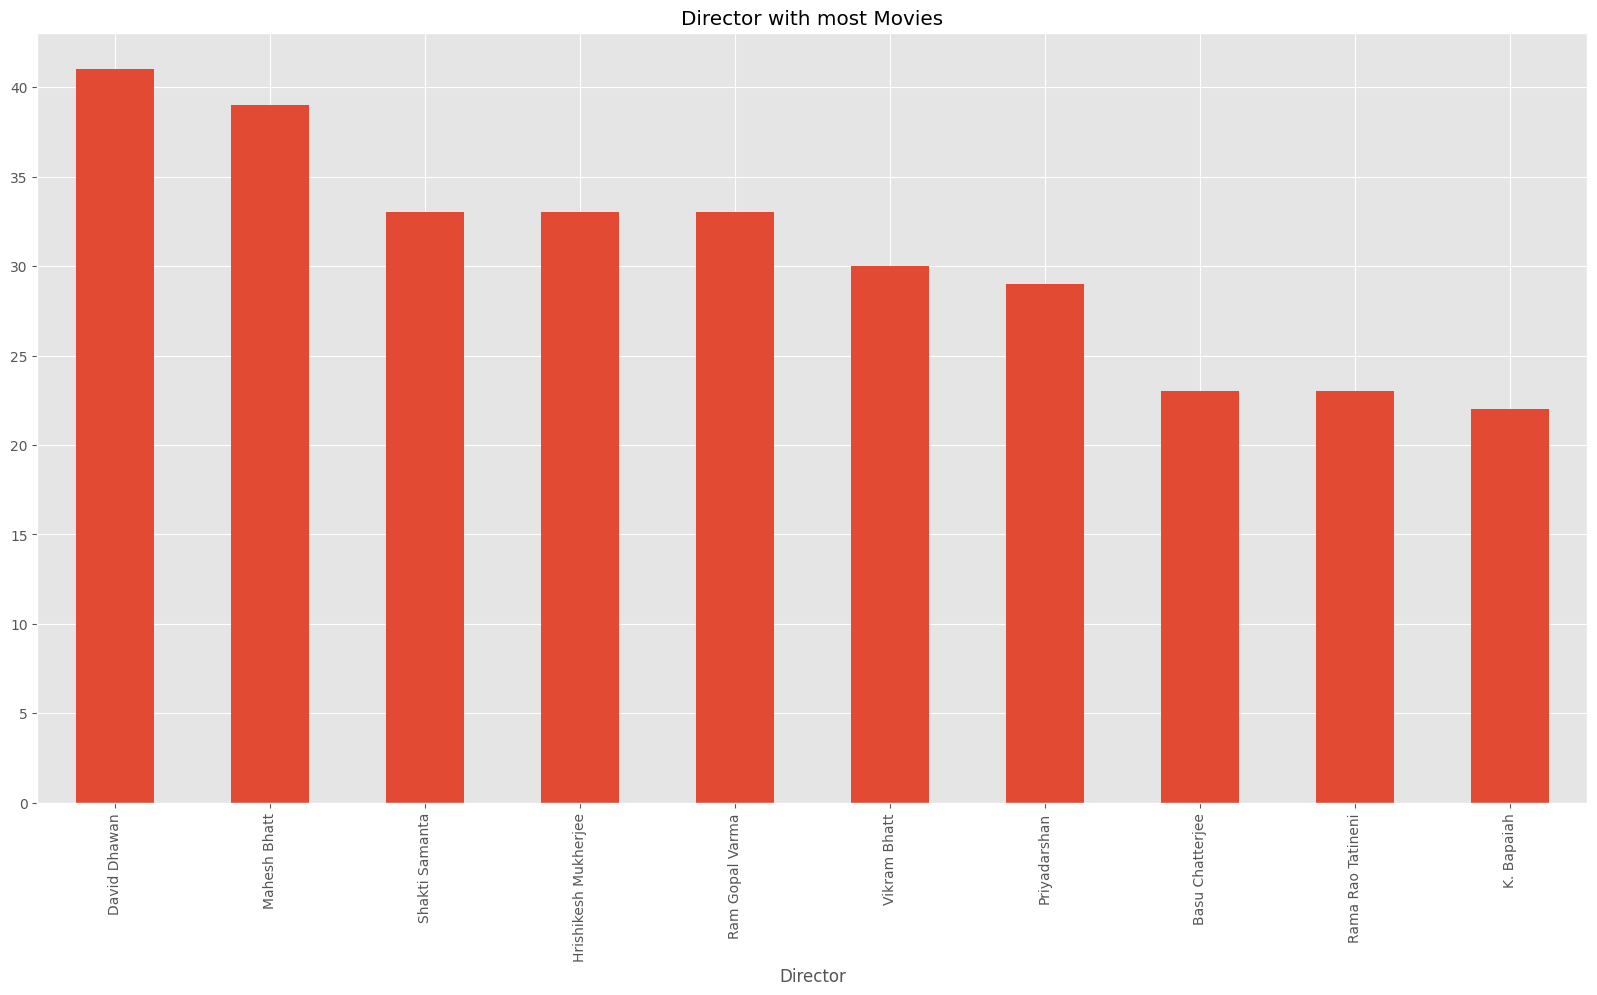

In [51]:
plt.figure(figsize=(20,10))
df['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

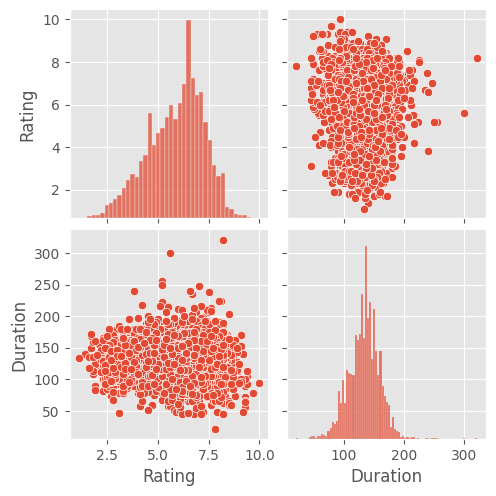

In [49]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']]);

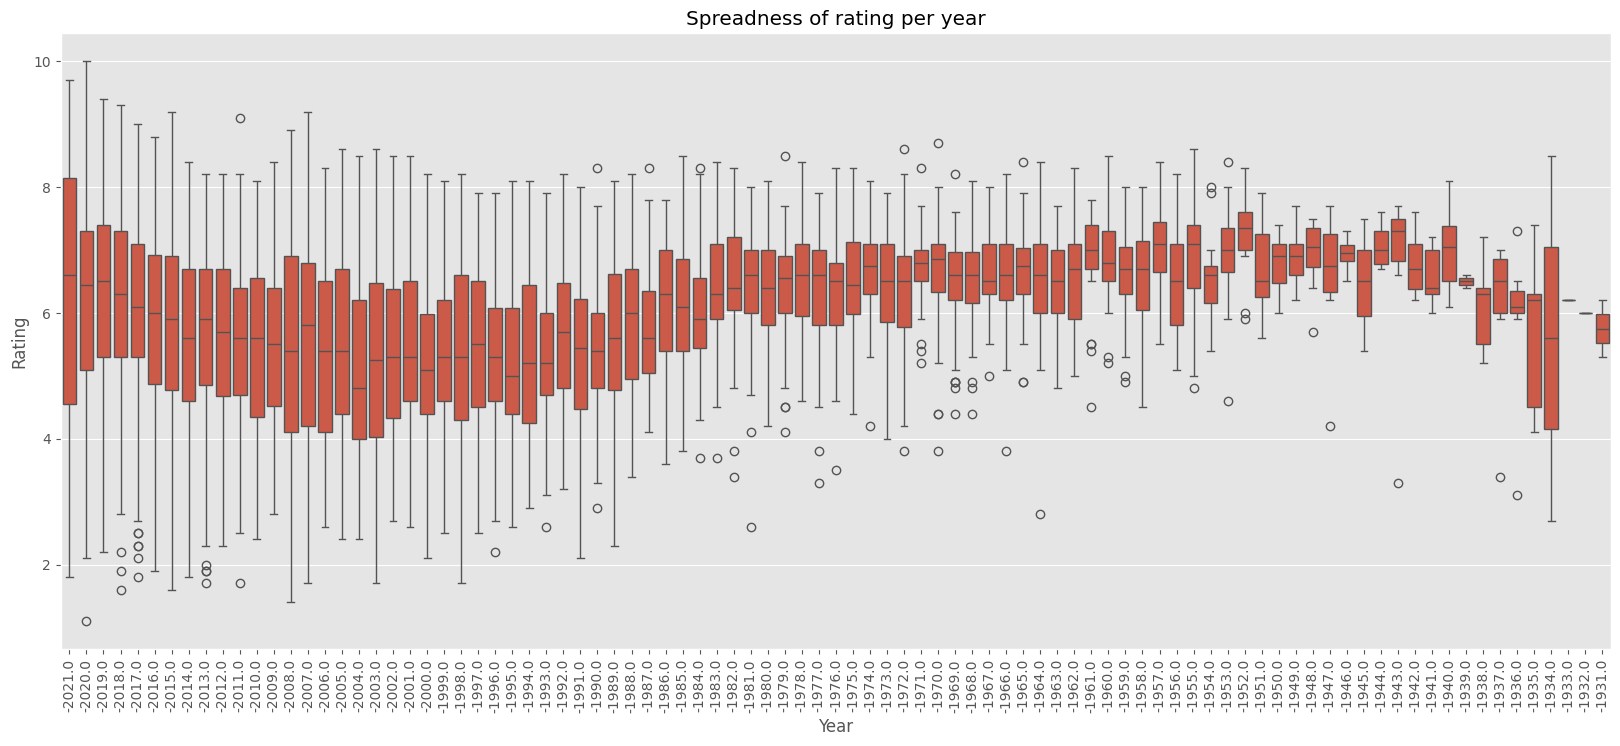

In [57]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

In [58]:
top_10=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top_10

TOP_10 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
6852,June,Drama,9.4
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
1729,Baikunth,Family,9.3
5125,God of gods,Documentary,9.3
13231,Sindhustan,"Documentary, Family, History",9.3


In [59]:
df.describe(include="object")

,Name,Genre,Votes,Director,Actor 1
count,5653,5653,5653,5653,5653
unique,5379,375,2025,2427,1955
top,Zindagi,Drama,7,David Dhawan,Amitabh Bachchan
freq,4,844,90,41,104


In [60]:
for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
['#Gadhvi (He thought he was Gandhi)' '#Yaaram' '...Aur Pyaar Ho Gaya' ...
 'Zulm Ki Zanjeer' 'Zulmi' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Genre
['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Famil